In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_auc_score

from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("creditcard.csv")

df.head()
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [3]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


In [4]:
X = df.drop('Class', axis=1)
y = df['Class']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [6]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [8]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

y_train_sm.value_counts()


Class
0    227451
1    227451
Name: count, dtype: int64

In [9]:
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)


In [10]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
iso = IsolationForest(contamination=0.0017, random_state=42)
iso.fit(X_train)

y_pred_iso = iso.predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)


In [12]:
print(classification_report(y_test, y_pred_iso))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.34      0.32        98

    accuracy                           1.00     56962
   macro avg       0.66      0.67      0.66     56962
weighted avg       1.00      1.00      1.00     56962



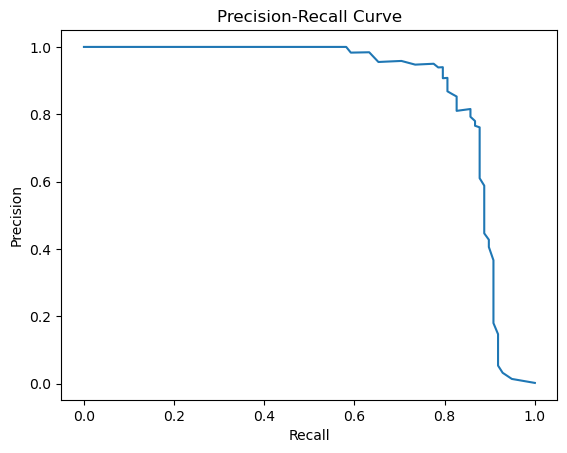

In [13]:
y_scores = rf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
